# K-Nearest Neigbor Regression (KNN)

Predict the bike demand in the next hour based on previously evaluated features

In [1]:
import pandas as pd
import numpy as np
import re
import datetime as dt #for working with times objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
import warnings
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

import dataframe with features

In [2]:
df_boston_weather = pd.read_pickle("df_boston.pkl")
df_boston_weather = df_boston_weather.drop("start_time", axis=1)
df_boston_weather = df_boston_weather.drop("spring", axis=1)
df_boston_weather = df_boston_weather.drop("summer", axis=1)
df_boston_weather = df_boston_weather.drop("autumn", axis=1)
df_boston_weather = df_boston_weather.drop("winter", axis=1)
df_boston_weather = df_boston_weather.drop("hour", axis=1)
df_boston_weather

,count,mean_temp,precip,rushhour,weekday,season
6,0,-5.6,0,0,1,4
7,0,-5.6,0,1,1,4
8,4,-5.6,0,1,1,4
9,2,-4.4,0,1,1,4
10,8,-5.6,0,0,1,4
...,...,...,...,...,...,...
8755,26,11.7,0,0,1,4
8756,10,11.1,0,0,1,4
8757,22,10.6,0,0,1,4
8758,18,10.0,0,0,1,4


Define X (features) and y (target value) - vector

In [3]:
X = df_boston_weather.drop("count", axis=1)
y = df_boston_weather["count"]

## KNN-Regression: 1-Dimensional (`mean_temp`)

Do a KNN-Regression just based on one feature, to see how well the model performs

Split dataset in train and test set

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X["mean_temp"], y, test_size=0.3,random_state=10)

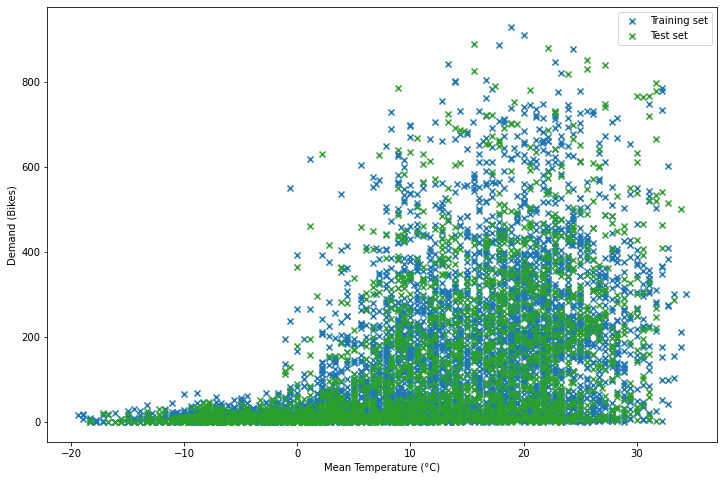

In [5]:
plt.figure(figsize = (12,8))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.legend(['Training set', 'Test set'])
plt.show()

do KNN-regression (initially with k=10)

In [6]:
KNN_reg = KNeighborsRegressor(n_neighbors=10)
KNN_model = KNN_reg.fit(x_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.values.reshape((-1,1)))

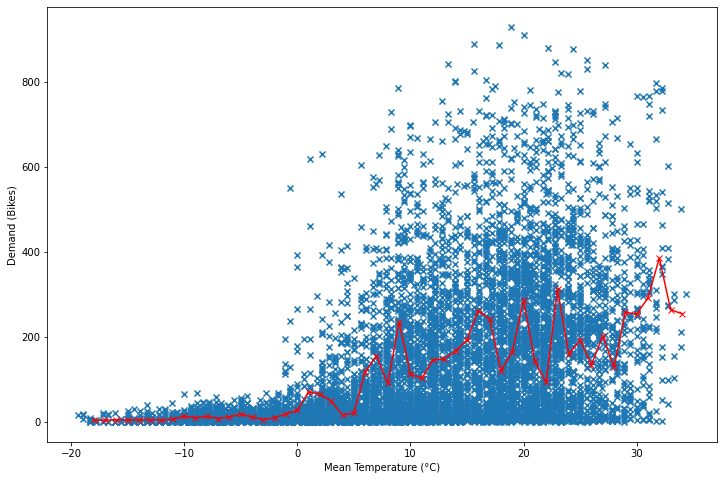

In [7]:
plt.figure(figsize = (12,8))
plt.scatter(X["mean_temp"], y, marker='x', color="C0")
plt.plot(np.arange(-18,35,1), KNN_model.predict(np.arange(-18,35,1).reshape((-1,1))), marker="x", color='r')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.show()

find optimal k

In [8]:
def find_knn (x_train, x_test, y_train, y_test,max_k):
    
    err_train = [] 
    err_test = []

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train.reshape((-1,1))), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test.reshape((-1,1))), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

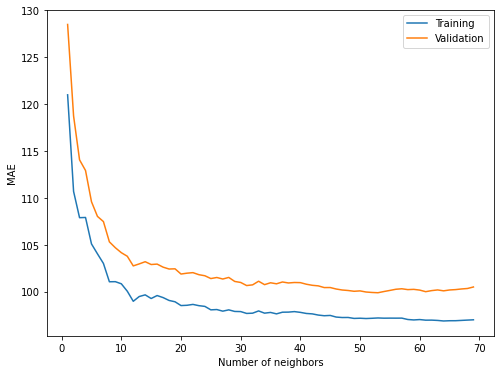

In [9]:
find_knn(x_train.values, x_test.values, y_train.values, y_test.values, 70)

looks like the optimal k is around 54, so we change it in our regression:

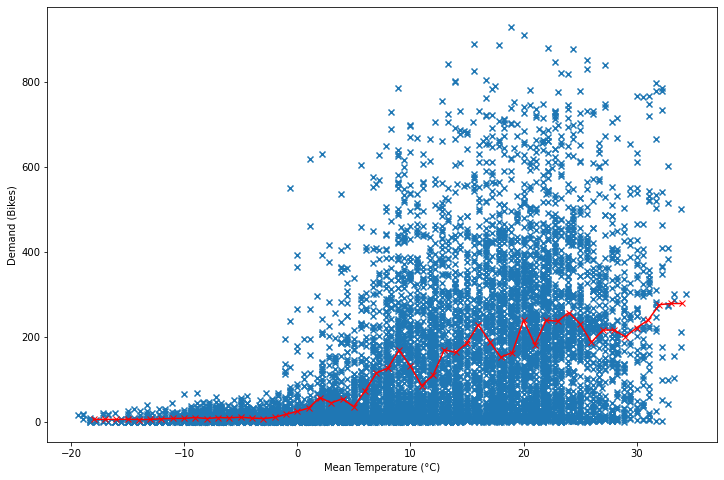

In [10]:
KNN_reg = KNeighborsRegressor(n_neighbors=54)
KNN_model = KNN_reg.fit(x_train.values.reshape((-1,1)), y_train) 

# Predict
y_hat_KNN = KNN_model.predict(x_test.values.reshape((-1,1)))

plt.figure(figsize = (12,8))
plt.scatter(X["mean_temp"], y, marker='x', color="C0")
plt.plot(np.arange(-18,35,1), KNN_model.predict(np.arange(-18,35,1).reshape((-1,1))), marker="x", color='r')
plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.show()

Evaluate the test set performance:

In [11]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
print("R2:",KNN_reg.score(x_test.values.reshape((-1,1)), y_test.values.reshape((-1,1))))

Test set performance:
MAE: 100.00068138457345 Bikes
RMSE: 146.41242461076266 Bikes
R2: 0.22633416465441325


-> the regression is not perfect, MAE is quite high

## KNN-Regression: 3-Dimensional (`mean_temp`, `season`, `rushhour`)

Add additional features to improve our model and have a look at the errors

split dataset in train and test set

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X[["mean_temp", "season", "rushhour"]], y, test_size=0.3,random_state=10)

Plot the demand in each season, differentiate between rushhour or no rushhour

<Figure size 1152x576 with 0 Axes>

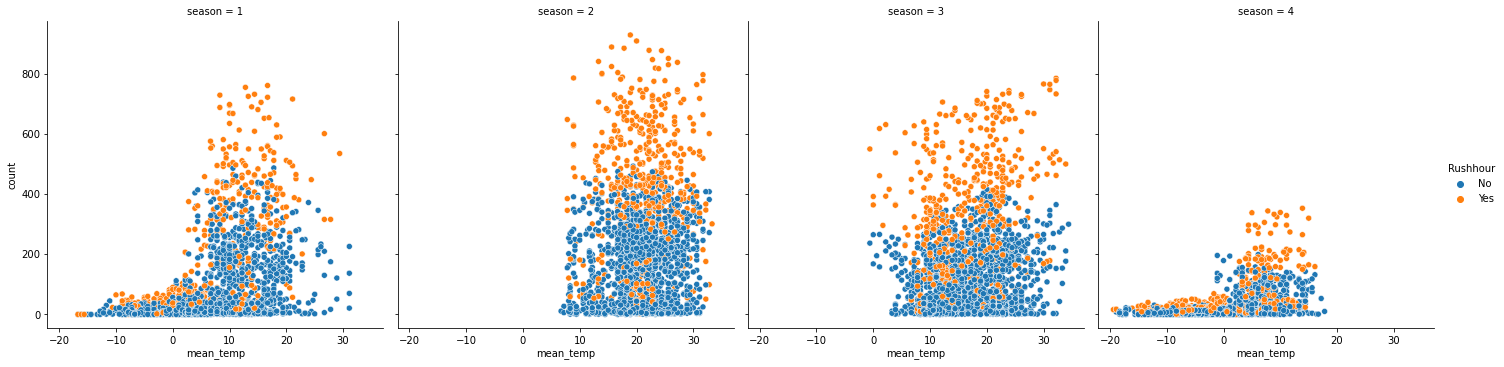

In [13]:
plt.figure(figsize=(16,8))
plot_season = sns.relplot(x=X["mean_temp"], y=y, hue=X["rushhour"],
            col=X["season"])
new_title = 'Rushhour'
plot_season._legend.set_title(new_title)
new_labels = ['No', 'Yes']
for t, l in zip(plot_season._legend.texts, new_labels): t.set_text(l)
plt.show()

In [14]:
xp_all = df_boston_weather["mean_temp"].values
yp_all = df_boston_weather["count"].values

# Spring and rushhour
xp_spring_wd = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==1)]
xp_spring_wd = xp_spring_wd["mean_temp"].values
yp_spring_wd = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==1)]
yp_spring_wd = yp_spring_wd["count"].values

# Spring and rushhour
xp_spring_we = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==0)]
xp_spring_we = xp_spring_we["mean_temp"].values
yp_spring_we = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==0)]
yp_spring_we = yp_spring_we["count"].values

# Summer and rushhour
xp_summer_wd = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==1)]
xp_summer_wd = xp_summer_wd["mean_temp"].values
yp_summer_wd = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==1)]
yp_summer_wd = yp_summer_wd["count"].values

# Summer and rushhour
xp_summer_we = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==0)]
xp_summer_we = xp_summer_we["mean_temp"].values
yp_summer_we = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==0)]
yp_summer_we = yp_summer_we["count"].values

# Autumn and rushhour
xp_autumn_wd = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==1)]
xp_autumn_wd = xp_autumn_wd["mean_temp"].values
yp_autumn_wd = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==1)]
yp_autumn_wd = yp_autumn_wd["count"].values

# Autumn and rushhour
xp_autumn_we = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==0)]
xp_autumn_we = xp_autumn_we["mean_temp"].values
yp_autumn_we = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==0)]
yp_autumn_we = yp_autumn_we["count"].values

# Winter and rushhour
xp_winter_wd = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==1)]
xp_winter_wd = xp_winter_wd["mean_temp"].values
yp_winter_wd = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==1)]
yp_winter_wd = yp_winter_wd["count"].values

# Winter and rushhour
xp_winter_we = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==0)]
xp_winter_we = xp_winter_we["mean_temp"].values
yp_winter_we = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==0)]
yp_winter_we = yp_winter_we["count"].values

In [32]:
#Maybe useful later
def split():
    # Spring and rushhour
    xp_spring_wd = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==1)]
    xp_spring_wd = xp_spring_wd["mean_temp"].values
    yp_spring_wd = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==1)]
    yp_spring_wd = yp_spring_wd["count"].values

    # Spring and rushhour
    xp_spring_we = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==0)]
    xp_spring_we = xp_spring_we["mean_temp"].values
    yp_spring_we = df_boston_weather[(df_boston_weather["season"]==1) & (df_boston_weather["rushhour"]==0)]
    yp_spring_we = yp_spring_we["count"].values

    # Summer and rushhour
    xp_summer_wd = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==1)]
    xp_summer_wd = xp_summer_wd["mean_temp"].values
    yp_summer_wd = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==1)]
    yp_summer_wd = yp_summer_wd["count"].values

    # Summer and rushhour
    xp_summer_we = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==0)]
    xp_summer_we = xp_summer_we["mean_temp"].values
    yp_summer_we = df_boston_weather[(df_boston_weather["season"]==2) & (df_boston_weather["rushhour"]==0)]
    yp_summer_we = yp_summer_we["count"].values

    # Autumn and rushhour
    xp_autumn_wd = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==1)]
    xp_autumn_wd = xp_autumn_wd["mean_temp"].values
    yp_autumn_wd = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==1)]
    yp_autumn_wd = yp_autumn_wd["count"].values

    # Autumn and rushhour
    xp_autumn_we = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==0)]
    xp_autumn_we = xp_autumn_we["mean_temp"].values
    yp_autumn_we = df_boston_weather[(df_boston_weather["season"]==3) & (df_boston_weather["rushhour"]==0)]
    yp_autumn_we = yp_autumn_we["count"].values

    # Winter and rushhour
    xp_winter_wd = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==1)]
    xp_winter_wd = xp_winter_wd["mean_temp"].values
    yp_winter_wd = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==1)]
    yp_winter_wd = yp_winter_wd["count"].values

    # Winter and rushhour
    xp_winter_we = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==0)]
    xp_winter_we = xp_winter_we["mean_temp"].values
    yp_winter_we = df_boston_weather[(df_boston_weather["season"]==4) & (df_boston_weather["rushhour"]==0)]
    yp_winter_we = yp_winter_we["count"].values
    return xp_spring_wd, yp_spring_wd, xp_spring_we, yp_spring_we, xp_summer_wd, yp_summer_wd, xp_summer_we, yp_summer_we, xp_autumn_wd, yp_autumn_wd, xp_autumn_we, yp_autumn_we, xp_winter_wd, yp_winter_wd, xp_winter_we, yp_winter_we

In [33]:
xp_spring = df_boston_weather[(df_boston_weather['season']==1)]
xp_summer = df_boston_weather[(df_boston_weather['season']==2)]
xp_autumn = df_boston_weather[(df_boston_weather['season']==3)]
xp_winter = df_boston_weather[(df_boston_weather['season']==4)]

In [34]:
yp_spring = xp_spring['count'].values
yp_summer = xp_spring['count'].values
yp_autumn = xp_spring['count'].values
yp_winter = xp_spring['count'].values

In [35]:
from sklearn.neighbors import KNeighborsRegressor

def do_knn(xp, yp, n):
    
    x_train, x_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=10)
    #Fit model
    KNN_reg = KNeighborsRegressor(n_neighbors=n)
    KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train) 

    # Predict
    y_hat_KNN = KNN_model.predict(x_test.reshape((-1,1)))
    
    print("Test set performance:")
    print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
    print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
    print("R2:",KNN_reg.score(x_test.reshape((-1,1)), y_test))
    
    return KNN_reg, KNN_model, y_hat_KNN
    

In [36]:
def find_knn (x,y,max_k):
    
    err_train = [] 
    err_test = []
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=10)

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train.reshape((-1,1)), y_train)
        


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train.reshape((-1,1))), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test.reshape((-1,1))), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

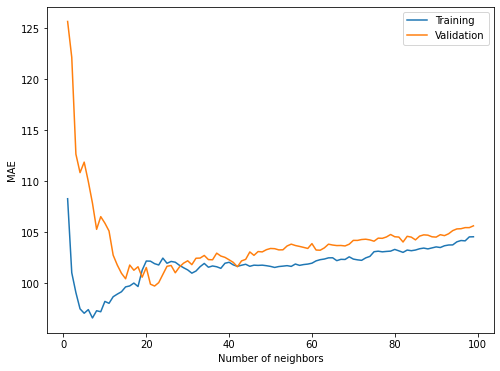

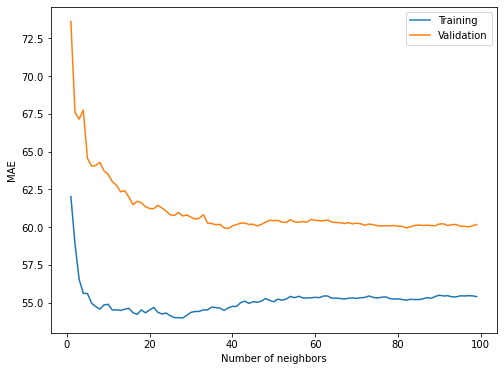

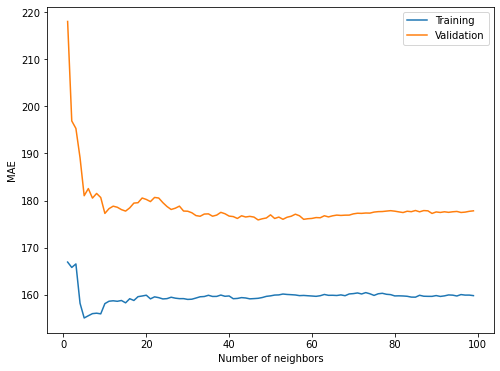

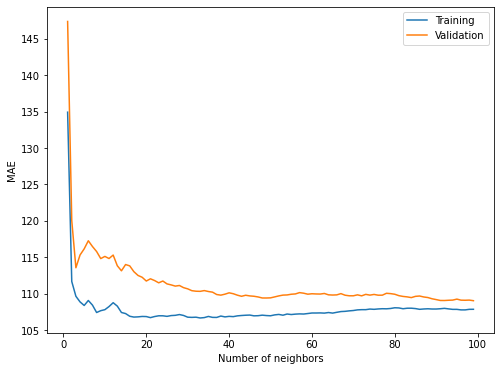

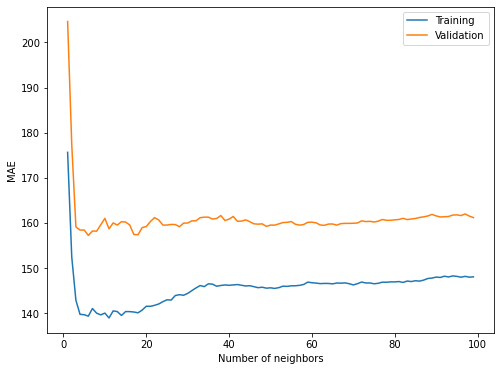

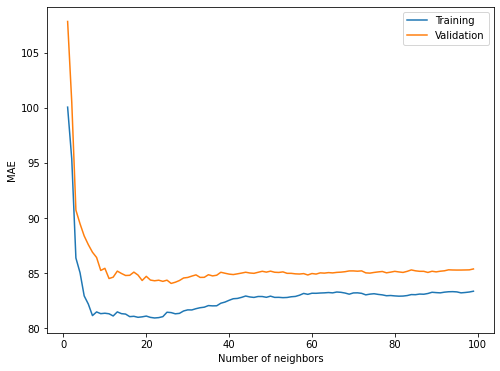

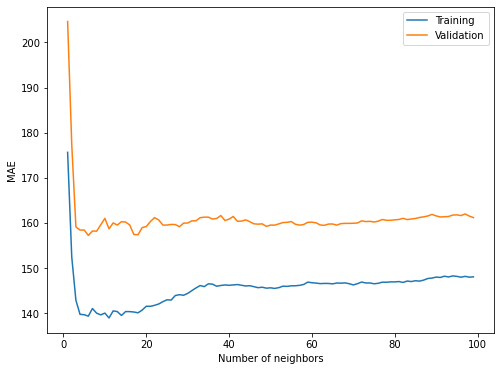

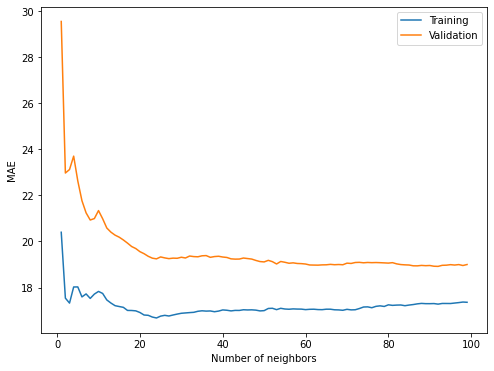

In [37]:
#Do some tests to find an optimal k
find_knn(xp_spring_wd,yp_spring_wd,100)
find_knn(xp_spring_we, yp_spring_we,100)
find_knn(xp_summer_wd,yp_summer_wd,100)
find_knn(xp_summer_we, yp_summer_we,100)
find_knn(xp_autumn_wd,yp_autumn_wd,100)
find_knn(xp_autumn_we, yp_autumn_we,100)
find_knn(xp_autumn_wd,yp_autumn_wd,100)
find_knn(xp_winter_we, yp_winter_we,100)

# KNN-Regression: Full feature set

Last but not least we will do an regression on the full feature set, including `mean_temp`, `precip`, `rushhour`, `season` and `Weekday`

In [21]:
features = list(zip(X["mean_temp"], X["rushhour"], X["season"], X["weekday"], X["precip"]))

In [22]:
features_s = pd.Series(features)

split data into train and test set

In [23]:
x_train, x_test, y_train, y_test = train_test_split(features, y, test_size=0.3,random_state=10)

create the KNN-model (initially with k=10) and print test set performance

In [24]:
# Fit model
KNN_reg = KNeighborsRegressor(n_neighbors=12)
KNN_model = KNN_reg.fit(x_train, y_train.values) 

# Predict
y_hat_KNN = KNN_model.predict(x_test)

In [25]:
print("Test set performance:")

print("MAE:",mean_absolute_error(y_hat_KNN, y_test), "Bikes")
print("RMSE:",(mean_squared_error(y_hat_KNN, y_test))**(0.5), "Bikes")  
print("R2:",KNN_reg.score(x_test, y_test))

Test set performance:
MAE: 77.27681248296538 Bikes
RMSE: 110.46521160134579 Bikes
R2: 0.5595986806615383


find optimal k

In [26]:
def find_knn (x_train, x_test, y_train, y_test,max_k):
    
    err_train = [] 
    err_test = []

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train, y_train)


        # compute errors
        err_train.append(mean_absolute_error(KNN_model.predict(x_train), y_train))
        err_test.append(mean_absolute_error(KNN_model.predict(x_test), y_test))
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("MAE")
    #plt.ylim((0,1))
    plt.show()

def find_knn_R2 (x_train, x_test, y_train, y_test,max_k):
    
    err_train = [] 
    err_test = []

    for n in np.arange(1,max_k):

        # fit model
        KNN_reg = KNeighborsRegressor(n_neighbors=n)
        KNN_model = KNN_reg.fit(x_train, y_train)


        # compute errors
        err_train.append(KNN_reg.score(x_train, y_train))
        err_test.append(KNN_reg.score(x_test, y_test))
        
        
    plt.figure(figsize = (8,6))
    plt.plot(np.arange(1,max_k), err_train,np.arange(1,max_k), err_test)
    plt.legend(["Training", "Validation"])
    plt.xlabel("Number of neighbors")
    plt.ylabel("R2")
    #plt.ylim((0,1))
    plt.show()

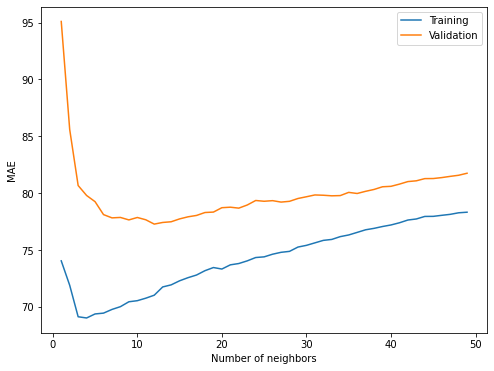

In [27]:
find_knn(x_train, x_test, y_train.values, y_test.values, 50)

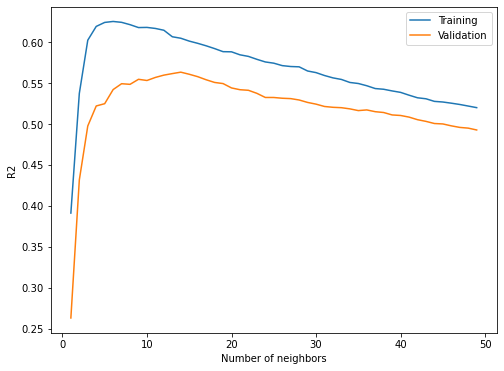

In [28]:
find_knn_R2(x_train, x_test, y_train.values, y_test.values, 50)

Define a function to predict the amount of bikes in the next hour (with optimal k):

In [29]:
def calc_demand(mean_temp, rushhour, season, Weekday, precip):
    features = [[mean_temp, rushhour, season, Weekday, precip]]
    do_knn(features)

def do_knn(features):
    # Fit model
    KNN_reg = KNeighborsRegressor(n_neighbors=12)
    KNN_model = KNN_reg.fit(x_train, y_train.values) 

    # Predict
    y_hat_KNN = KNN_model.predict(x_test)
    
    print("The expected demand in the next hour is: ", KNN_reg.predict(features),
         " with a MAE of: ", mean_absolute_error(y_hat_KNN, y_test), "Bikes, and a ",
            "R2 score of: ", KNN_reg.score(x_test, y_test))
    return KNN_reg.predict(features)

In [30]:
# sample: 22° C, at rushhour, summer, on a weekday, no precip
calc_demand(22, 1, 1, 1, 0)

The expected demand in the next hour is:  [423.5]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383


#### Plot Some example predictions

The expected demand in the next hour is:  [5.91666667]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383
The expected demand in the next hour is:  [12.5]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383
The expected demand in the next hour is:  [347.5]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383
The expected demand in the next hour is:  [95.91666667]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383
The expected demand in the next hour is:  [326.83333333]  with a MAE of:  77.27681248296538 Bikes, and a  R2 score of:  0.5595986806615383


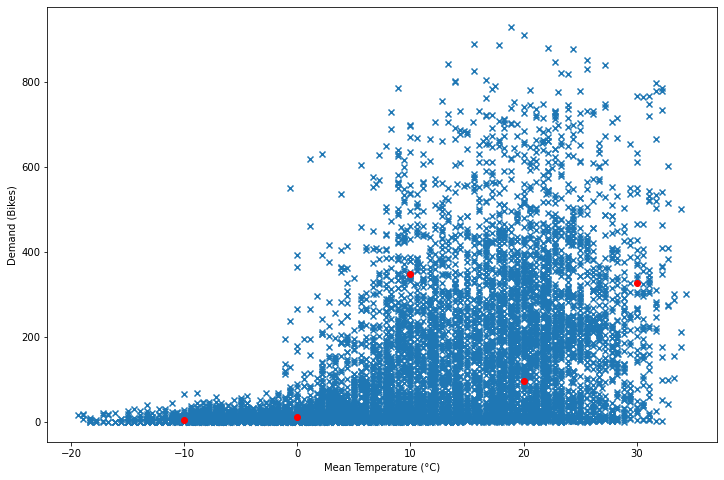

In [31]:
plt.figure(figsize = (12,8))
plt.scatter(X["mean_temp"], y, marker='x', color="C0")

point = do_knn([[-10, 0, 3, 1, 1]])
plt.plot(-10, point[0], marker="o", color='r')

point = do_knn([[0, 0, 2, 0, 0]])
plt.plot(0, point[0], marker="o", color='r')

point = do_knn([[10, 1, 0, 1, 1]])
plt.plot(10, point[0], marker="o", color='r')

point = do_knn([[20, 0, 0, 0, 1]])
plt.plot(20, point[0], marker="o", color='r')

point = do_knn([[30, 1, 1, 1, 0]])
plt.plot(30, point[0], marker="o", color='r')

plt.xlabel("Mean Temperature (°C)")
plt.ylabel("Demand (Bikes)")
plt.show()